In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from collections import defaultdict as ddict, Counter
from itertools import chain

import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [30]:
from collections import defaultdict as ddict
titles = []
authors = ddict(set)
affiliations = ddict(set)
authors_per_paper = ddict(int)
affiliations_per_paper = ddict(int)
with open('kdd.txt') as f:
    for line in f:
        if line.startswith('Authors:'):
            splitted = line[8:].strip().split(';')
            authors_per_paper[len(splitted)] += 1
            total_aff = set()
            for author_aff in splitted:
                author, aff = author_aff.split(':')
#                 k = author_aff.split(':')
#                 if len(k) == 1:
#                     print(line, k)
                authors[author].add(title)
                affiliations[aff].add(title)
                total_aff.add(aff)
            affiliations_per_paper[len(total_aff)] += 1
        else:
            title = line.strip()
            titles.append(title)

In [5]:
def plot_bar(top_orgs, title='Number of papers', width=1200, height=800, xname='country', yname='papers',
                          xaxis_title="", yaxis_title="# papers", tickangle=45, tickmode='auto', margin_bottom=200,
                          save_html=False,
                          fontsize=20, title_y=0.98,
                          ):
    fig = px.bar(top_orgs, x=xname, y=yname, height=height, width=width, text='papers')
    fig.update_layout(
        title={
            'text': title,
            'y': title_y,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        xaxis_title=xaxis_title,
        yaxis_title=yaxis_title,
        font=dict(
            #         family="Courier New",
            size=fontsize,
            color="black"
        ),
        margin=dict(b=margin_bottom),
        xaxis=dict(tickangle=tickangle,
                   tickmode='linear'),

    )
    fig.update_traces(marker_color='blue')
    #     fig.update_traces(textposition='inside')

    if save_html:
        pio.write_html(fig, file='index.html', auto_open=True)
    fig.show()

In [68]:
stop = ['graph', 'node', 'vertex', 'gnn', 'edge ']

graph_papers = set()
for title in titles:
    for w in stop:
        if w in title.lower():
            graph_papers.add(title)
            break

pd.DataFrame(list(graph_papers)).to_csv('graph_papers.csv', index=False, header=False)

In [72]:
65/217

0.2995391705069124

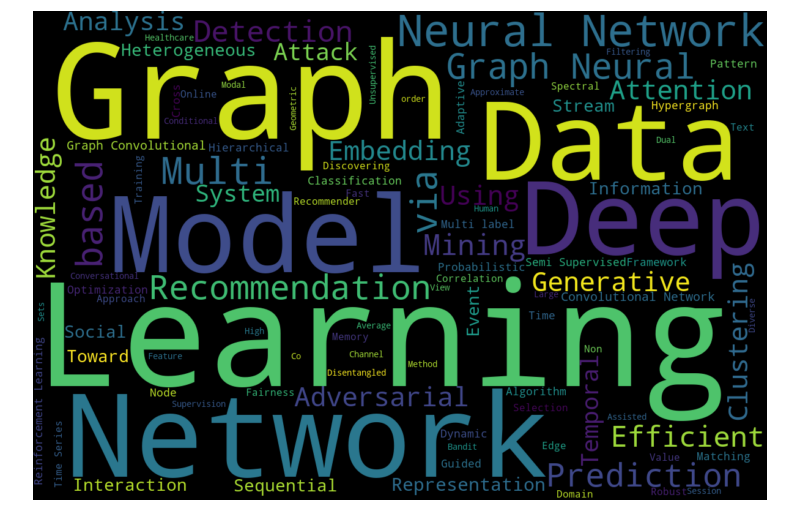

In [57]:
wordcloud = WordCloud(max_words=100, width=1200, height=800).generate(' '.join(titles))
plt.figure(figsize=(16,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
sorted([(len(t), t) for t in titles])

[(16, 'Geodesic Forests'),
 (17, 'Diverse Rule Sets'),
 (28, 'Hyperbolic Distance Matrices'),
 (28, 'Kronecker Attention Networks'),
 (32, 'Directional Multivariate Ranking'),
 (33, 'Task-Adaptive Graph Meta-learning'),
 (35, 'Learning Based Distributed Tracking'),
 (35, 'Neural Dynamics on Complex Networks'),
 (36, 'Neural Subgraph Isomorphism Counting'),
 (36, 'Towards Deeper Graph Neural Networks'),
 (37, 'Graph Structural-topic Neural Network'),
 (39, 'Hypergraph Clustering Based on PageRank'),
 (40, 'From Online to Non-i.i.d. Batch Learning'),
 (40, 'Incremental Lossless Graph Summarization'),
 (40, 'Semantic Search in Millions of Equations'),
 (41, 'Off-policy Bandits with Deficient Support'),
 (42, 'Average Sensitivity of Spectral Clustering'),
 (42, 'On Sampled Metrics for Item Recommendation'),
 (43, 'Algorithmic Aspects of Temporal Betweenness'),
 (43, 'Competitive Analysis for Points of Interest'),
 (43, 'Evaluating Fairness using Permutation Tests'),
 (43, 'InFoRM: Individu

In [65]:
df = pd.DataFrame(sorted(affiliations_per_paper.items()), columns=['affiliations', 'papers'])
plot_bar(df, title='KDD 2020: Number of affiliations per paper', xname='affiliations', margin_bottom=20, width=600, height=400)

In [66]:
df = pd.DataFrame(sorted(authors_per_paper.items()), columns=['authors', 'papers'])
plot_bar(df, title='KDD 2020: Number of authors per paper', xname='authors', margin_bottom=20, width=600, height=400)

In [19]:
k = 3
sorted_items = sorted(authors.items(), key=lambda x: len(x[1]), reverse=True)
df = pd.DataFrame([(v[0], len(v[1])) for v in sorted_items if len(v[1]) >= k], columns=['Author', 'papers'])
plot_bar(df, title='KDD 2020: Top Authors', xname='Author')

In [17]:
k = 5
sorted_items = sorted(affiliations.items(), key=lambda x: len(x[1]), reverse=True)
df = pd.DataFrame([(v[0], len(v[1])) for v in sorted_items if len(v[1]) >= k], columns=['Affiliation', 'papers'])
plot_bar(df, title='KDD 2020: Top Affiliations', xname='Affiliation')